# Food Demand Forecasting 

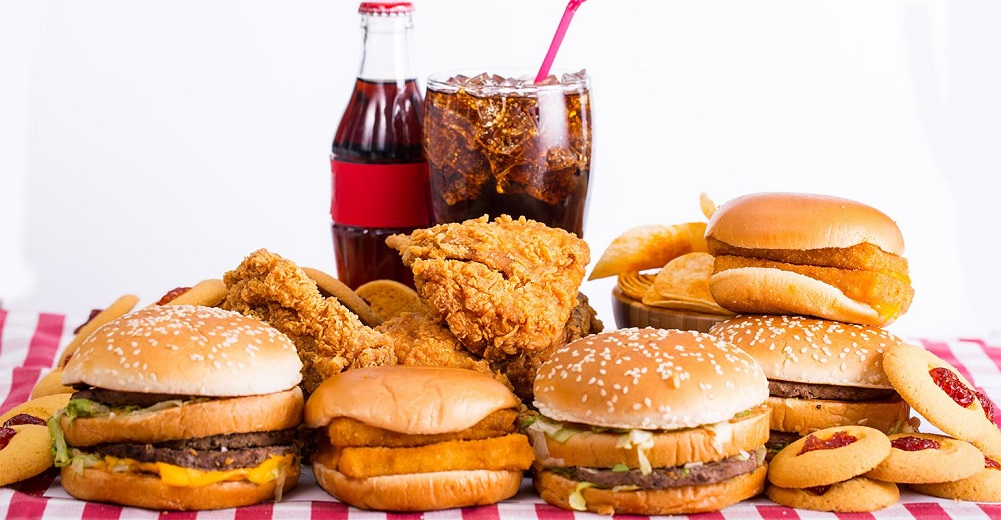

# Table of Content :-

1- Importing Relevant Libraries

2- Data Preprocessing

3- Feature Engineering

4- Exploratory Data Analysis

5- Model Building

6- Prediction On Test Data

7- Submission

**Problem Statement :-**

- Your client is a meal delivery company which operates in multiple cities. They have various fulfillment centers in these cities for dispatching meal orders to their customers. The client wants you to help these centers with demand forecasting for upcoming weeks so that these centers will plan the stock of raw materials accordingly.

- The replenishment of majority of raw materials is done on weekly basis and since the raw material is perishable, the procurement planning is of utmost importance. Secondly, staffing of the centers is also one area wherein accurate demand forecasts are really helpful. Given the following information, the task is to predict the demand for the next 10 weeks (Weeks: 146-155) for the center-meal combinations in the test set:  

- Historical data of demand for a product-center combination (Weeks: 1 to 145)
- Product(Meal) features such as category, sub-category, current price and discount
- Information for fulfillment center like center area, city information etc.
 
 

**Objective :-**

In this case, we will analyse the demand of food by the customers in last 145 weeks by using different features provided in the data itself,and try to figure out that for which locations, category ,cuisine and price large number of orders has been placed.

After analysis ,predict the demand for meal in the next 10 weeks i.e,(146-155) for the center-meal combination.


**Inspiration :-**

Accurate forecating will help the meal delivery companies to know the approximate demand of meal in the upcoming weeks, saves lot of food from wastage and could give a new direction of growth to buisness.

**Acknowledgement :-**

Analytics Vidhya

# Importing Relevant Libraries

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import skew
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

# Data Preprocessing

- Now, Let's prepare the data for analysis purpose by merging the dataframes and take out all the relevant columns from the final data i.e, train and test both.
- Add new column num_orders_per_day by using feature engineering.
- Checking dtype of features in the data.
- Checking missing values in the data , using heatmap.
- Checking duplicated values. 

In [62]:
train=pd.read_csv('train_meal.csv')
train.head(8)

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40
5,1270037,1,55,1248,251.23,252.23,0,0,28
6,1191377,1,55,1778,183.36,184.36,0,0,190
7,1499955,1,55,1062,182.36,183.36,0,0,391


In [63]:
train.shape

(456548, 9)

In [64]:
test=pd.read_csv('Test_meal.csv')
test.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


In [65]:
test.shape

(32573, 8)

In [66]:
meal_info=pd.read_csv('meal_info.csv')
meal_info.head(8)

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian
5,1311,Extras,Thai
6,1062,Beverages,Italian
7,1778,Beverages,Italian


In [67]:
meal_info.shape

(51, 3)

In [68]:
fulfilment_center_info=pd.read_csv('fulfilment_center_info.csv')
fulfilment_center_info.head(8)

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6
5,64,553,77,TYPE_A,4.4
6,129,593,77,TYPE_A,3.9
7,139,693,34,TYPE_C,2.8


In [69]:
fulfilment_center_info.shape

(77, 5)

**Merging DataFrames**

In [70]:
train=train.merge(meal_info,on='meal_id')
train=train.merge(fulfilment_center_info,on='center_id')

test=test.merge(meal_info,on='meal_id')
test=test.merge(fulfilment_center_info,on='center_id')

print('Shapes :')
print('*'*60)
print('Train: ',train.shape)
print('Test: ',test.shape)

Shapes :
************************************************************
Train:  (456548, 15)
Test:  (32573, 14)


In [71]:
train=train[['id','week','region_code','city_code','center_id','meal_id','checkout_price',
             'base_price','emailer_for_promotion','homepage_featured','category','cuisine','num_orders']]
train

,id,week,region_code,city_code,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,category,cuisine,num_orders
0,1379560,1,56,647,55,1885,136.83,152.29,0,0,Beverages,Thai,177
1,1018704,2,56,647,55,1885,135.83,152.29,0,0,Beverages,Thai,323
2,1196273,3,56,647,55,1885,132.92,133.92,0,0,Beverages,Thai,96
3,1116527,4,56,647,55,1885,135.86,134.86,0,0,Beverages,Thai,163
4,1343872,5,56,647,55,1885,146.50,147.50,0,0,Beverages,Thai,215
...,...,...,...,...,...,...,...,...,...,...,...,...,...
456543,1437396,141,77,473,61,2104,583.03,630.53,0,1,Fish,Continental,13
456544,1060716,142,77,473,61,2104,581.03,582.03,0,0,Fish,Continental,42
456545,1029231,143,77,473,61,2104,583.03,581.03,0,0,Fish,Continental,40
456546,1141147,144,77,473,61,2104,582.03,581.03,0,0,Fish,Continental,53


In [72]:
train.shape

(456548, 13)

In [73]:
train.describe()

,id,week,region_code,city_code,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000
mean,1.250096e+06,74.768771,56.614566,601.553399,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760
std,1.443548e+05,41.524956,17.641306,66.195914,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798
min,1.000000e+06,1.000000,23.000000,456.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000
25%,1.124999e+06,39.000000,34.000000,553.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000
50%,1.250184e+06,76.000000,56.000000,596.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000
75%,1.375140e+06,111.000000,77.000000,651.000000,110.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,324.000000
max,1.499999e+06,145.000000,93.000000,713.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.00000,24299.000000


# Feature_Engineering

In [74]:
train['num_orders_per_day']=np.round(train['num_orders']/7)
train.head()

,id,week,region_code,city_code,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,category,cuisine,num_orders,num_orders_per_day
0,1379560,1,56,647,55,1885,136.83,152.29,0,0,Beverages,Thai,177,25.0
1,1018704,2,56,647,55,1885,135.83,152.29,0,0,Beverages,Thai,323,46.0
2,1196273,3,56,647,55,1885,132.92,133.92,0,0,Beverages,Thai,96,14.0
3,1116527,4,56,647,55,1885,135.86,134.86,0,0,Beverages,Thai,163,23.0
4,1343872,5,56,647,55,1885,146.50,147.50,0,0,Beverages,Thai,215,31.0


In [75]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456548 entries, 0 to 456547
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   region_code            456548 non-null  int64  
 3   city_code              456548 non-null  int64  
 4   center_id              456548 non-null  int64  
 5   meal_id                456548 non-null  int64  
 6   checkout_price         456548 non-null  float64
 7   base_price             456548 non-null  float64
 8   emailer_for_promotion  456548 non-null  int64  
 9   homepage_featured      456548 non-null  int64  
 10  category               456548 non-null  object 
 11  cuisine                456548 non-null  object 
 12  num_orders             456548 non-null  int64  
 13  num_orders_per_day     456548 non-null  float64
dtypes: float64(3), int64(9), object(2)
m

**Checking Missing Values**

<AxesSubplot:>

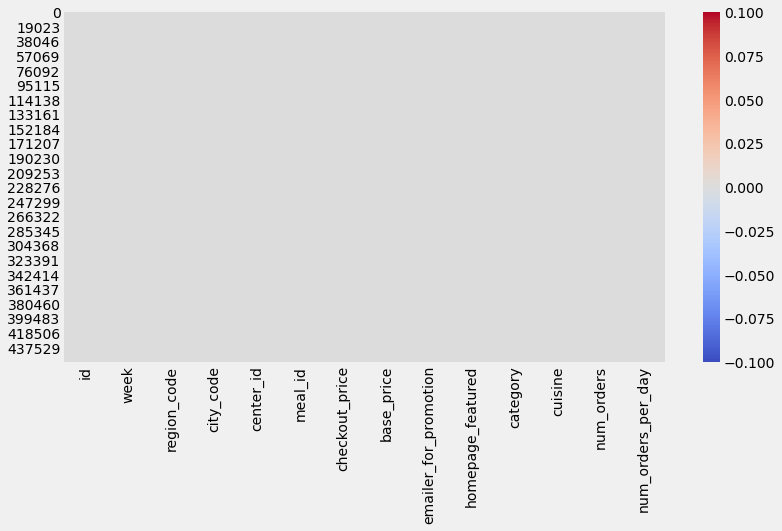

In [76]:
plt.figure(figsize=(12,6))
sns.heatmap(train.isnull(),cmap='coolwarm')

**Checking Duplicated values**

In [77]:
train.duplicated().sum()

0

# Exploratory Data Analyse

Let's Explore the data using different plots and analyse the previous trend of orders placed by the customers.
- firstly, try to understand the skewness in the data, using distplot and probability plot.
- Trend of orders with respect to weeks using lineplot.
- Frequency of orders with respect to different features like region_code,city_code,center_id,meal_id etc.
- Now, analysing the category and cuisine with  num_orders ,taking emailer_for_promotion/homepage_featured as hue to check what is the impact on num_orders before and after the promotion.
- Now analysing the correlation between the different features using heatmap.

center_id
Skewness:  0.3451290810300371


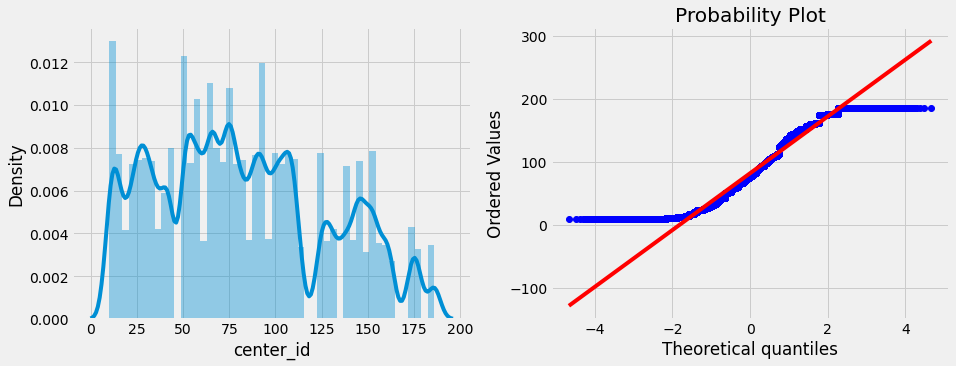

meal_id
Skewness:  -0.1728835587385912


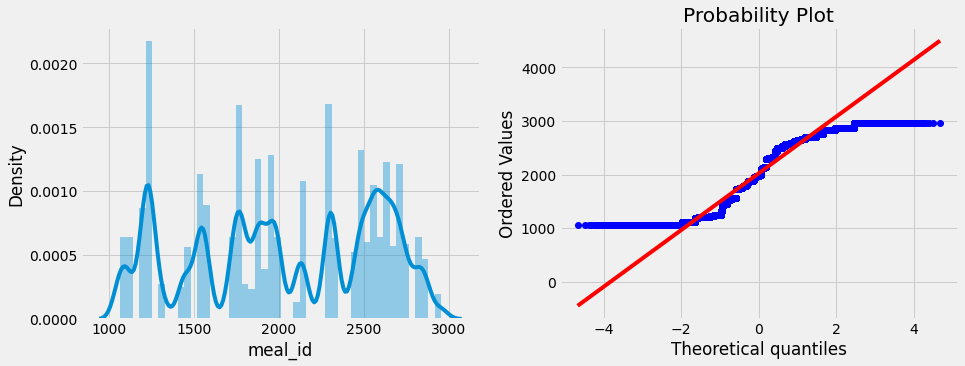

checkout_price
Skewness:  0.6723276957570563


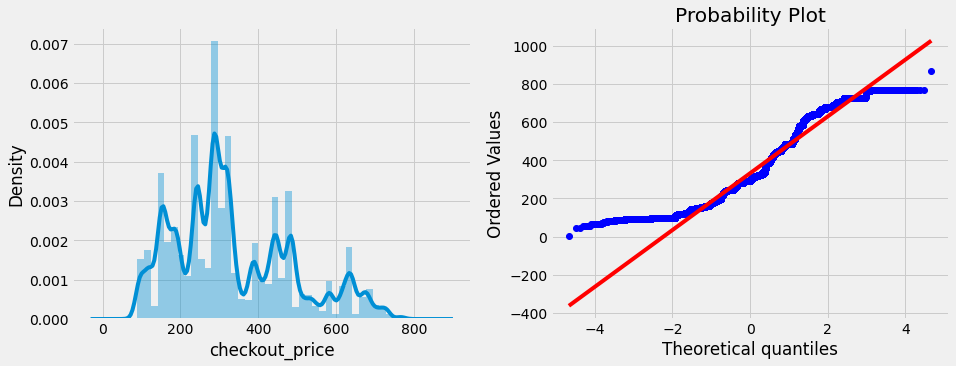

base_price
Skewness:  0.6376587790769982


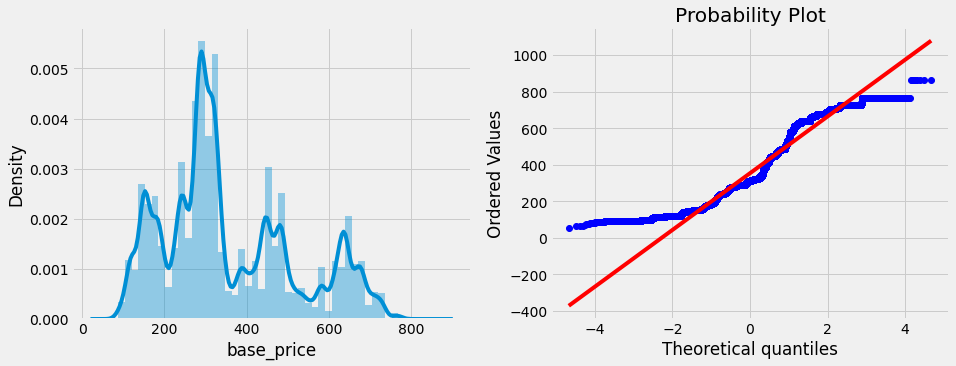

emailer_for_promotion
Skewness:  3.0677032092212744


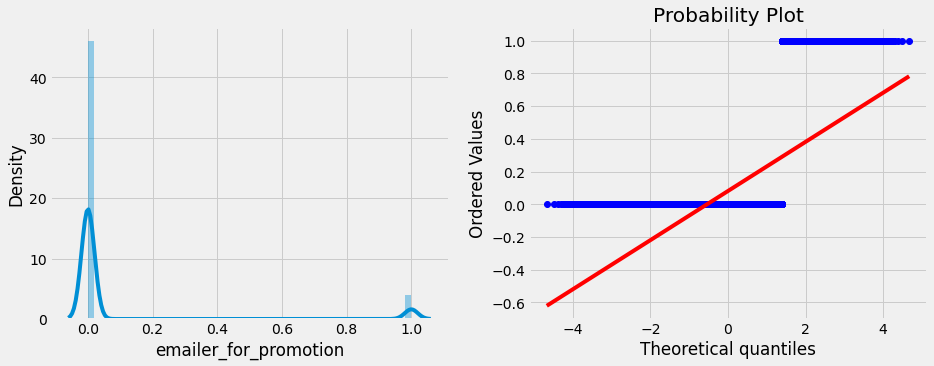

homepage_featured
Skewness:  2.506013392431186


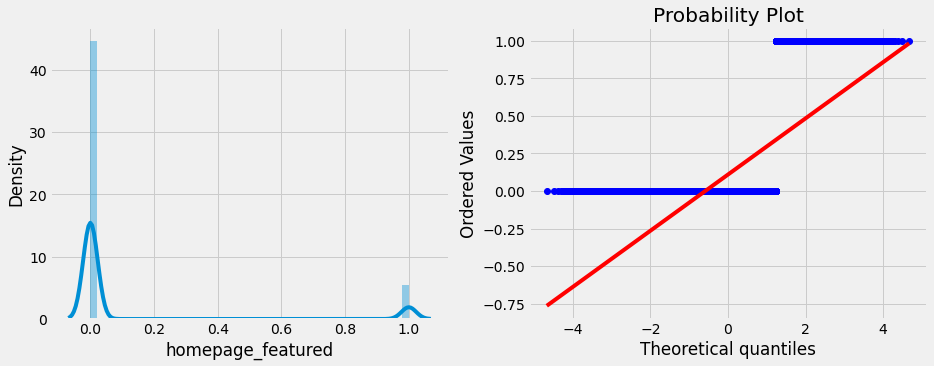

num_orders
Skewness:  6.929943296742632


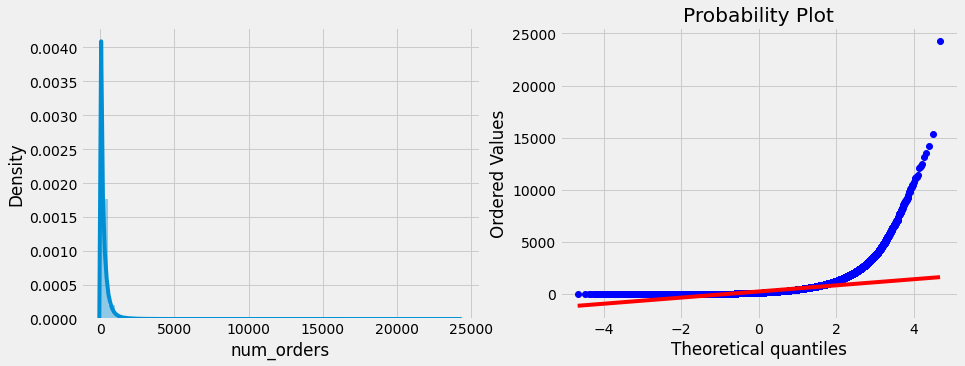

num_orders_per_day
Skewness:  6.9369312495752675


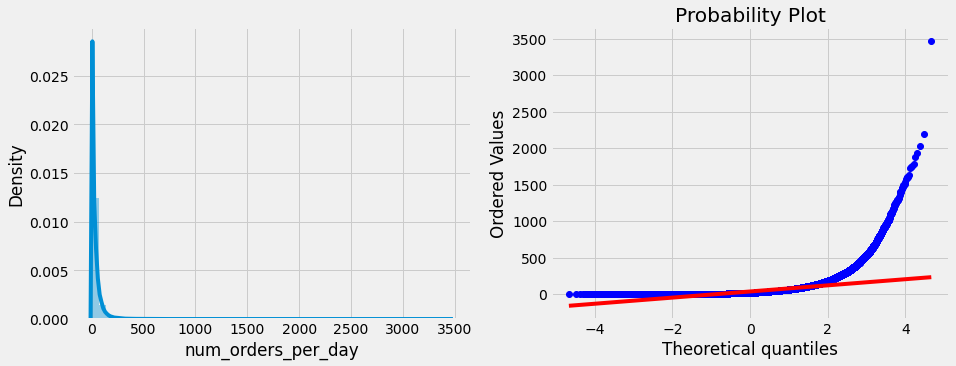

In [78]:
def dist_eval(df,col):
    plt.figure(figsize=(14,5))
    plt.subplot(1,2,1)
    sns.distplot(df[col],kde=True)
    plt.subplot(1,2,2)
    stats.probplot(df[col],dist="norm", plot=plt)
    plt.show() 
    
for col in train.drop(columns={'id','week','region_code','city_code','category','cuisine'}).columns:
    print(col)
    print('Skewness: ',skew(train[col]))
    dist_eval(train,col)
    

Text(0.5, 1.0, 'Num_orders vs Week')

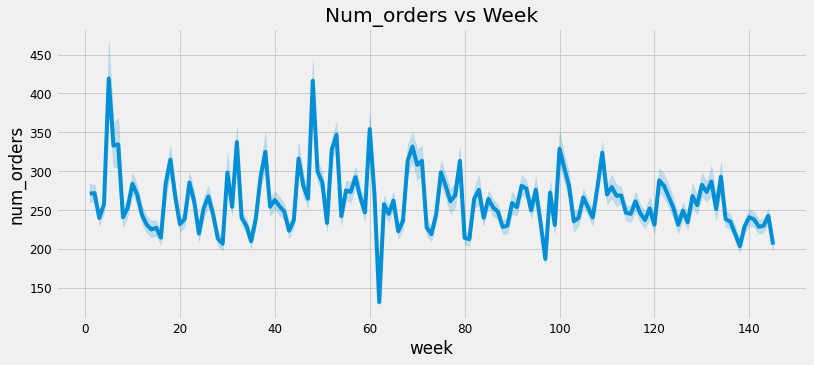

In [79]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,5))
sns.lineplot(train['week'],train['num_orders'], markers=True, dashes=True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Num_orders vs Week')

Text(0.5, 1.0, 'Num_orders vs Region_code')

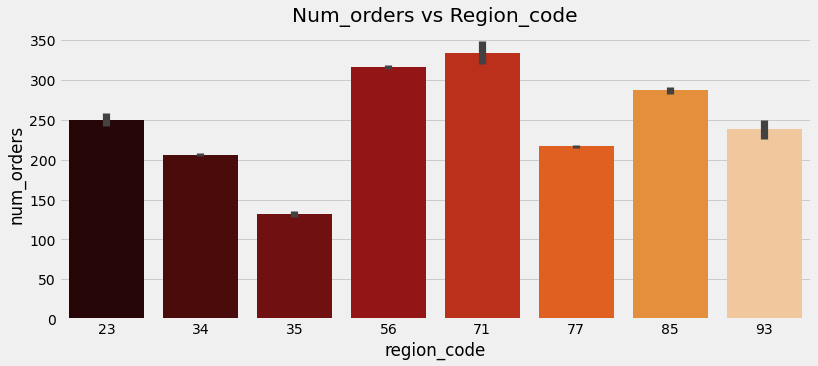

In [80]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,5))
sns.barplot(train['region_code'],train['num_orders'],palette='gist_heat')
plt.title('Num_orders vs Region_code')

Text(0.5, 1.0, 'Num_orders vs city_code')

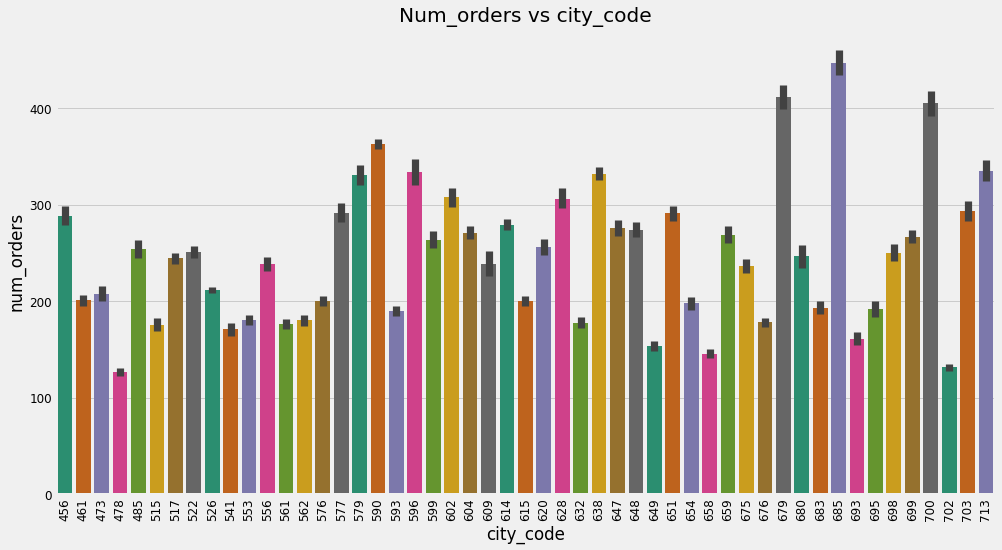

In [81]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,8))
sns.barplot(train['city_code'],train['num_orders'],palette='Dark2')
plt.xticks(rotation=90)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Num_orders vs city_code')

Text(0.5, 1.0, 'Num_orders vs Center_id')

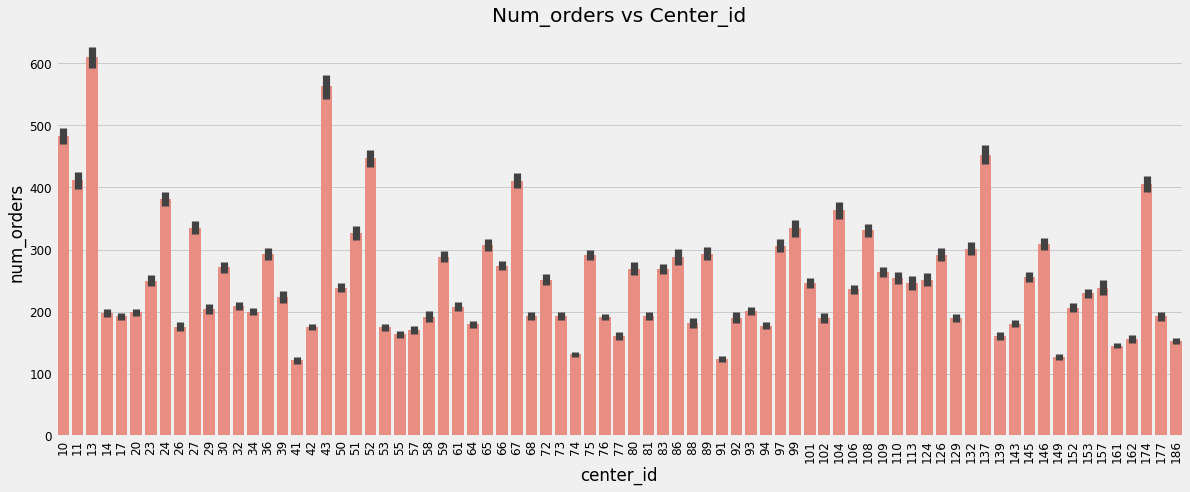

In [82]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(18,7))
sns.barplot(train['center_id'],train['num_orders'],
   color='salmon')
plt.xticks(rotation=90)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Num_orders vs Center_id')

Text(0.5, 1.0, 'Num_orders vs meal_id')

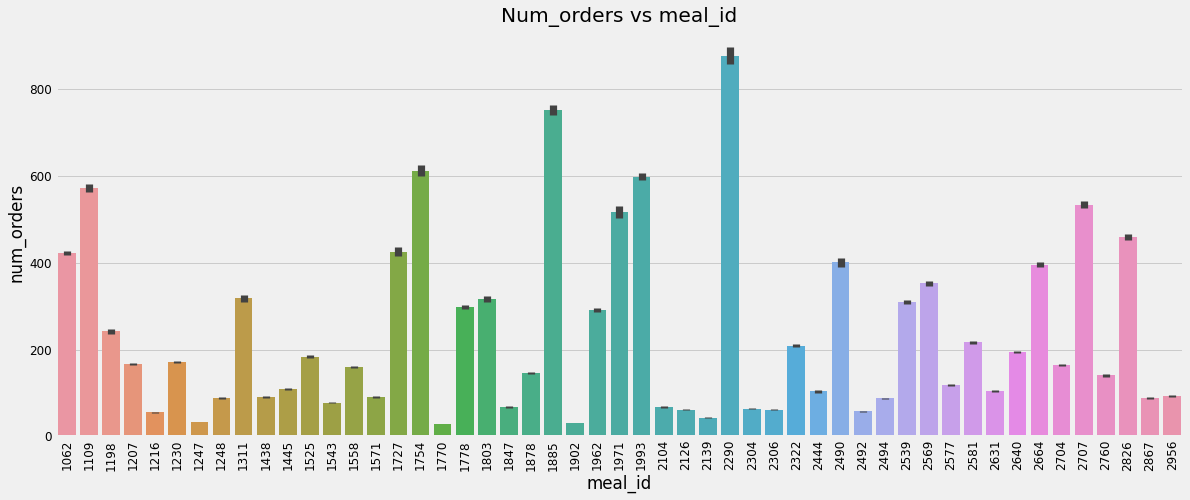

In [83]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(18,7))
sns.barplot(train['meal_id'],train['num_orders'])
plt.xticks(rotation=90)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Num_orders vs meal_id')

(array([-5000.,     0.,  5000., 10000., 15000., 20000., 25000., 30000.]), [])

<Figure size 1008x432 with 0 Axes>

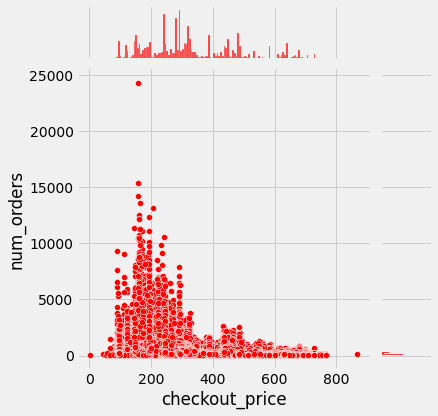

In [84]:
plt.figure(figsize=(14,6))
sns.jointplot(train['checkout_price'],train['num_orders'],color='red',
    height=6)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


Text(0.5, 1.0, 'Checkout_price vs Category')

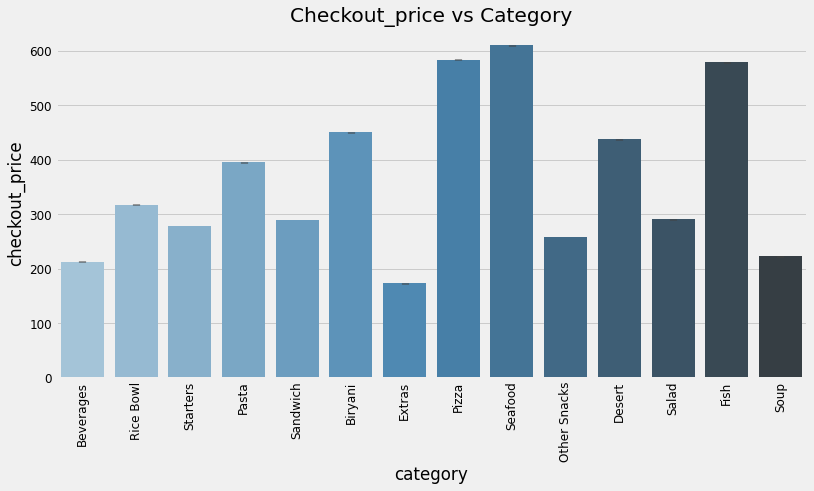

In [85]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,6))
sns.barplot(train['category'],train['checkout_price'],
    color='blue',
    palette='Blues_d')
plt.xticks(rotation='vertical')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Checkout_price vs Category')

Text(0.5, 1.0, 'Num_orders vs Category')

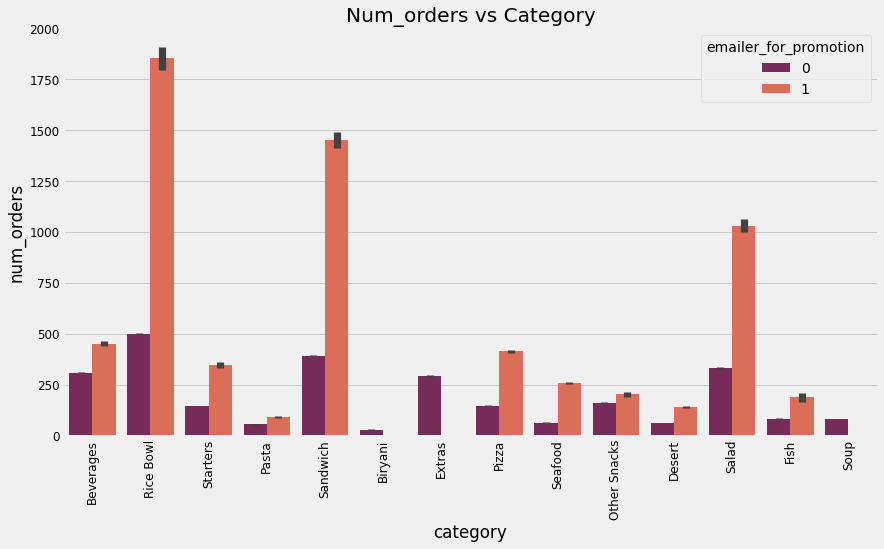

In [86]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(13,7))
sns.barplot(x=train['category'],y=train['num_orders'],hue=train['emailer_for_promotion'],palette='rocket')
plt.xticks(rotation='vertical')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Num_orders vs Category')
#Almost for every category number of orders increases when we have promomted them.

Text(0.5, 1.0, 'Num_orders vs Cuisine')

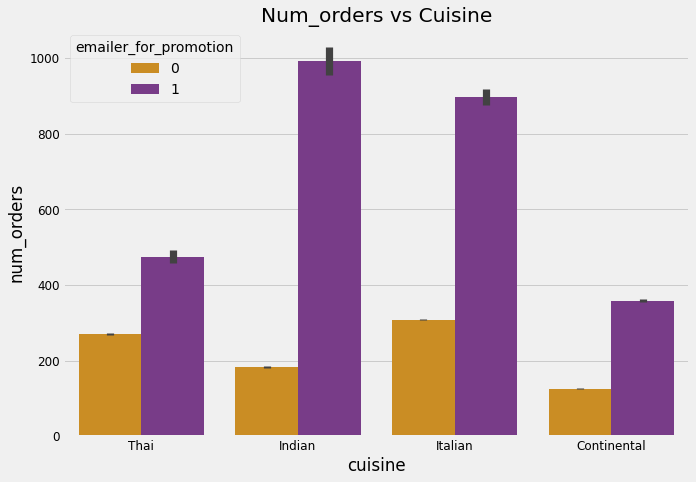

In [87]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,7))
sns.barplot(train['cuisine'],train['num_orders'],hue=train['emailer_for_promotion'],palette='CMRmap_r',)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Num_orders vs Cuisine')

Text(0.5, 1.0, 'Num_orders vs Cuisine')

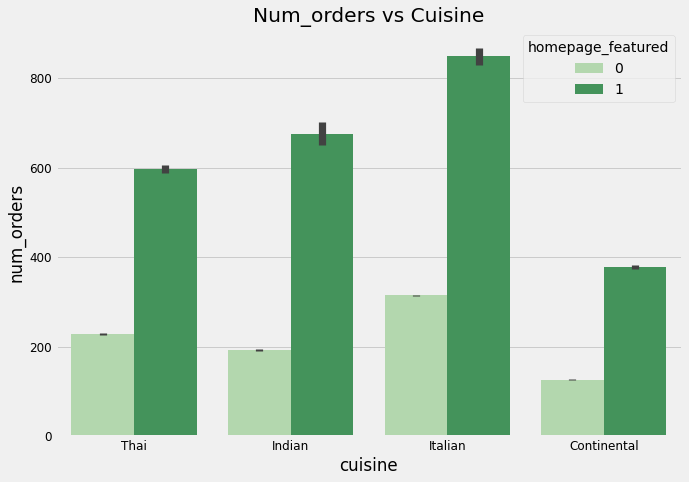

In [88]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,7))
sns.barplot(train['cuisine'],train['num_orders'],hue=train['homepage_featured'],palette='Greens')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Num_orders vs Cuisine')

Text(0.5, 1.0, 'Num_orders vs Category')

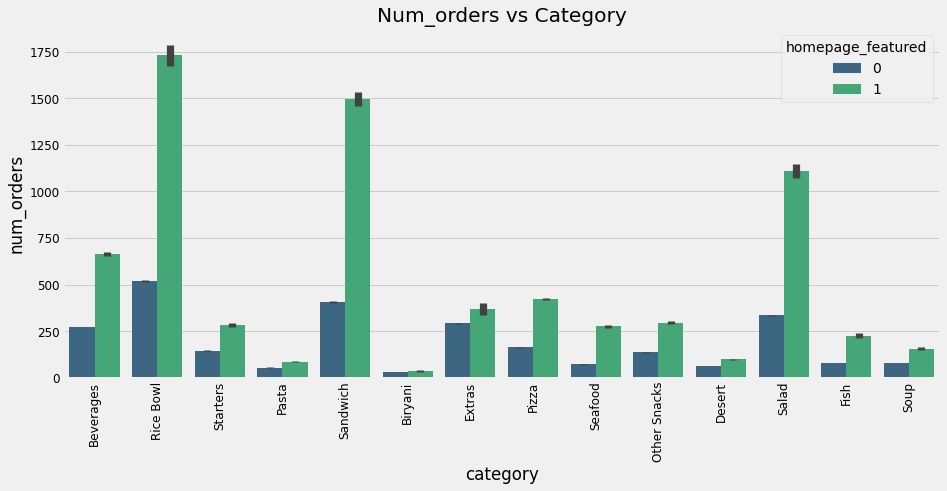

In [89]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(14,6))
sns.barplot(train['category'],train['num_orders'],hue=train['homepage_featured'],palette='viridis')
plt.xticks(rotation='vertical')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Num_orders vs Category')

<Figure size 864x504 with 0 Axes>

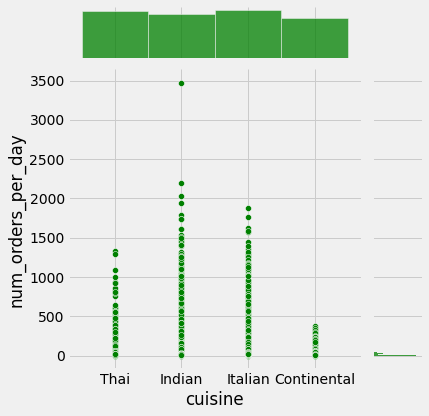

In [90]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
sns.jointplot(train['cuisine'],train['num_orders_per_day'],kind='scatter',color='green')

**Observations :-**

- The skewness values of all dependent and independent features indicates highly skewness in the data,positive skewness present in emailer_for_promotion,homepage_featured,num_orders,num_orders_per_day.
- There are some weeks in between 0-20 and 40-60 in which num of orders got hike, and for some weeks also between 60-80 in which  orders downfall also came.
- For region code 56 and 71 , more than 300 orders were placed in the last 145 weeks.
- For city code 679 ,685 and 700 , more than 400 orders were placed in the last 145 weeks.
- For center id 13 and 43 , more than 500 orders were placed in the last 145 weeks.
- For meal id 1754,1885 and 2290 , more than 600 orders were placed in the last 145 weeks.
- Most of the orders were placed for meals having checkout price in the range of 100-300.
- Seafood is the most expensive food among all the meals.
- After email /homepage_featured promotion rice bowl category got maximum hike in their sales.
- After email promotion number of orders for Indian food reached close to 1000.

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]),
 [Text(0, 0.5, 'id'),
  Text(0, 1.5, 'week'),
  Text(0, 2.5, 'region_code'),
  Text(0, 3.5, 'city_code'),
  Text(0, 4.5, 'center_id'),
  Text(0, 5.5, 'meal_id'),
  Text(0, 6.5, 'checkout_price'),
  Text(0, 7.5, 'base_price'),
  Text(0, 8.5, 'emailer_for_promotion'),
  Text(0, 9.5, 'homepage_featured'),
  Text(0, 10.5, 'num_orders'),
  Text(0, 11.5, 'num_orders_per_day')])

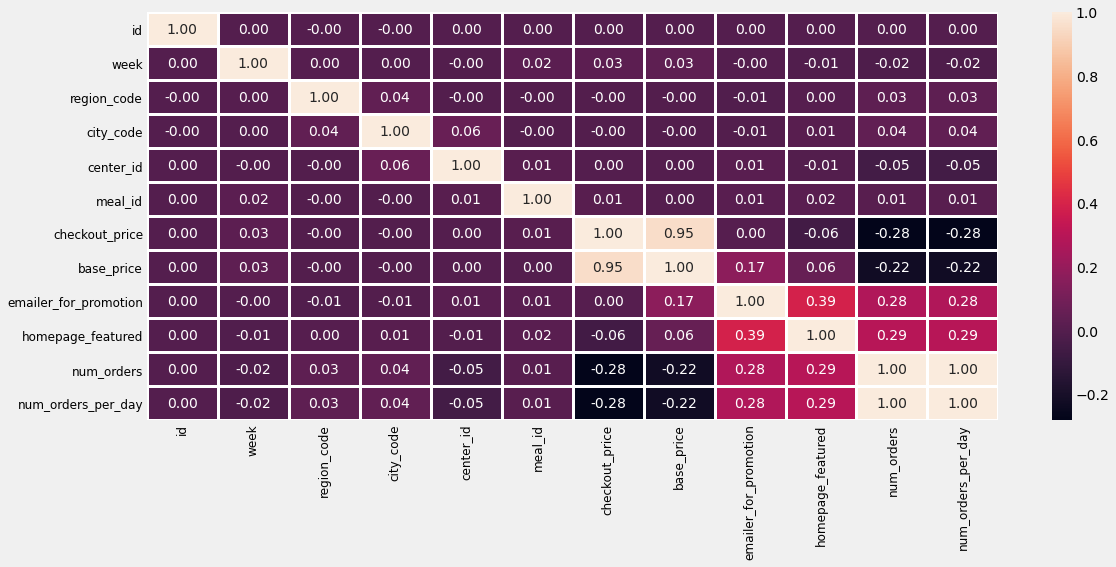

In [32]:
plt.figure(figsize=(17,7))
sns.heatmap(train.corr(),annot=True,linewidths=3,linecolor='white',cbar=True,fmt='.2f')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

- Since base_price is highly corr with checkout_price and emailer_for_promotion/homepage_featured almost
   establish same relation with the the target.
- Id does'nt have any impact on target.
- Hence Dropping base_price, homepage_featured, id ,num_orders_per_day.

**Dropping features :-**
base_price,homepage_featured,id,num_orders_per_day

In [33]:
train.drop(columns={'base_price','homepage_featured','id','num_orders_per_day'},inplace=True)

In [34]:
#Reduce Skewness
train['checkout_price']=np.sqrt(train['checkout_price'])
train['center_id']=np.sqrt(train['center_id'])
train['meal_id']=np.sqrt(train['meal_id'])
train['week']=np.sqrt(train['week'])
train['emailer_for_promotion']=np.sqrt(train['emailer_for_promotion'])

print('Shape of train: ',train.shape)

Shape of train:  (456548, 10)


**Outliers :-**

Now , It's time to check outliers in the data for all the numerical features, Using Box plot diagram.

week


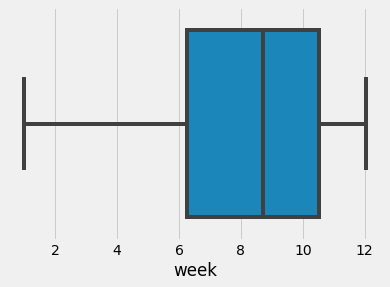

region_code


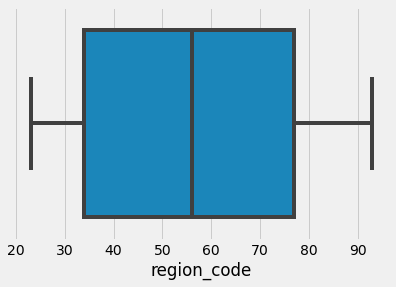

city_code


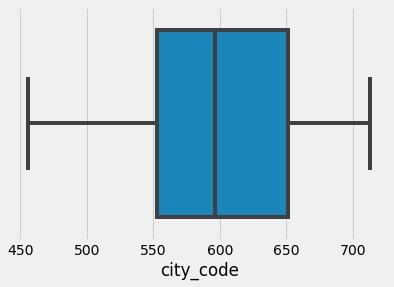

center_id


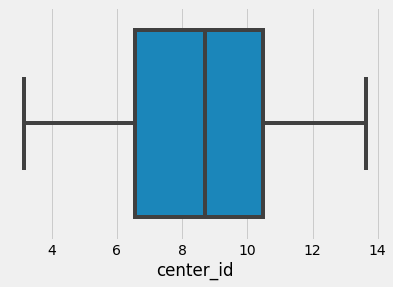

meal_id


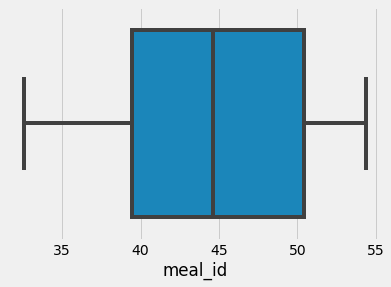

checkout_price


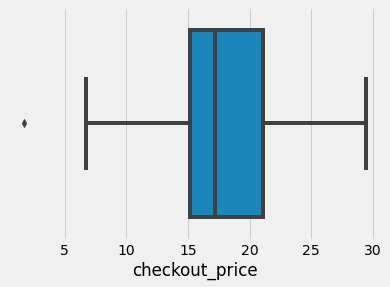

In [35]:
def Outliers(df,col):
    plt.subplots()
    sns.boxplot(df[col])
    plt.show()
    
for col in train.drop(columns={'num_orders','emailer_for_promotion','category','cuisine'}).columns:
    print(col)
    Outliers(train,col)

- As we can see the numerical features week , center_id and meal_id does'nt have any outliers.
- But checkout_price consists one outlier in it, we can neglect it.


**Encoding of categorical columns :-**

In [36]:
train=pd.get_dummies(data=train,columns=['category','cuisine'],drop_first=True)
train.head()

,week,region_code,city_code,center_id,meal_id,checkout_price,emailer_for_promotion,num_orders,category_Biryani,category_Desert,...,category_Pizza,category_Rice Bowl,category_Salad,category_Sandwich,category_Seafood,category_Soup,category_Starters,cuisine_Indian,cuisine_Italian,cuisine_Thai
0,1.000000,56,647,7.416198,43.416587,11.697436,0.0,177,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1.414214,56,647,7.416198,43.416587,11.654613,0.0,323,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1.732051,56,647,7.416198,43.416587,11.529094,0.0,96,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2.000000,56,647,7.416198,43.416587,11.655900,0.0,163,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2.236068,56,647,7.416198,43.416587,12.103718,0.0,215,0,0,...,0,0,0,0,0,0,0,0,0,1


In [37]:
X_train,X_test,y_train,y_test=train_test_split(train.drop('num_orders',axis=1),train['num_orders'],test_size=0.3)
print('Shape: ')
print('*'*50)
print('Shape of X_train: ',X_train.shape)
print('Shape of y_train: ',y_train.shape)
print('Shape of X_test: ',X_test.shape)
print('Shape of y_test: ',y_test.shape)

Shape: 
**************************************************
Shape of X_train:  (319583, 23)
Shape of y_train:  (319583,)
Shape of X_test:  (136965, 23)
Shape of y_test:  (136965,)


**Data Standardisation :-**

Now scaling the data to bring the values into specific range i.e, (0-1) with mean as 0 and standard deviation value as 1 .

In [38]:
scale=StandardScaler()
X_train=scale.fit_transform(X_train)
X_test=scale.transform(X_test)

# Model Building 

Now Using different algorithms to build the model and compairing their evaluation metrics like r2_score and rmsle to get best result out it.

The following algorithms are:

1- Random Forests Regressor (r2_score:84.30%, RMSLE:50.04)

2- Linear Regression (r2_score:34.80%, RMSLE :142.25)

3- Gradient Boosting Regressor (r2_score:60.45% ,RMSLE :90.65)

4- XgBoosts Regressor (r2_score:83.46% ,RMSLE :85.02)

**Random Forests Regressor**

--------------------------------------------------------Random Forests Regressor--------------------------------------------------------


In [39]:
Rf=RandomForestRegressor()
Rf.fit(X_train,y_train)
y_pred=Rf.predict(X_test)
y_pred[y_pred<0]=0
print('r2_score: ',r2_score(y_test,y_pred))
print('RMSLE: ', 100*np.sqrt(mean_squared_log_error(y_test, y_pred)))

r2_score:  0.8430938250357003
RMSLE:  50.04230984725133


**Linear Regression**

----------------------------------------------------------- Linear Regression----------------------------------------------------------------

In [40]:
Lr=LinearRegression()
Lr.fit(X_train,y_train)
y_pred=Lr.predict(X_test)
y_pred[y_pred<0]=0
print('r2_score: ',r2_score(y_test,y_pred))
print('RMSLE: ', 100*np.sqrt(mean_squared_log_error(y_test, y_pred)))

r2_score:  0.3480299110721379
RMSLE:  142.2220860532986


**Gradient Boosting Regressor**

-------------------------------------------------------Gradient Boosting Regressor---------------------------------------------------------

In [41]:
GB=GradientBoostingRegressor()
GB.fit(X_train,y_train)
y_pred=GB.predict(X_test)
y_pred[y_pred<0]=0
print('r2_score: ',r2_score(y_test,y_pred))
print('RMSLE: ', 100*np.sqrt(mean_squared_log_error(y_test, y_pred)))

r2_score:  0.6045098166049527
RMSLE:  90.6508657553129


**XgBoosts Regressor**

-----------------------------------------------------------XgBoosts Regressor--------------------------------------------------------------

In [42]:
from xgboost import XGBRegressor
xgb=XGBRegressor()
xgb.fit(X_train,y_train)
y_pred=xgb.predict(X_test)
y_pred[y_pred<0]=0
print('r2_score: ',r2_score(y_test,y_pred))
print('RMSLE: ', 100*np.sqrt(mean_squared_log_error(y_test, y_pred)))

r2_score:  0.8346043142859658
RMSLE:  85.02765088608959


**Conclusion**

Since Random Forests Regressor giving best r2_score and lowest RMSLE score , So I will chose Random forests regressor for doing prediction on my test datasets.

Random Forests Regressor (r2_score:84.30%, RMSLE:50.04)

# Prediction on test Data

In [44]:
testcopy=test.copy()
test.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,category,cuisine,city_code,region_code,center_type,op_area
0,1028232,146,55,1885,158.11,159.11,0,0,Beverages,Thai,647,56,TYPE_C,2.0
1,1262649,147,55,1885,159.11,159.11,0,0,Beverages,Thai,647,56,TYPE_C,2.0
2,1453211,149,55,1885,157.14,158.14,0,0,Beverages,Thai,647,56,TYPE_C,2.0
3,1262599,150,55,1885,159.14,157.14,0,0,Beverages,Thai,647,56,TYPE_C,2.0
4,1495848,151,55,1885,160.11,159.11,0,0,Beverages,Thai,647,56,TYPE_C,2.0


In [45]:
test=test[['week','region_code','city_code','center_id','meal_id','checkout_price','emailer_for_promotion','category','cuisine']]

In [47]:
test=pd.get_dummies(data=test,columns=['category','cuisine'],drop_first=True)
test.head()

,week,region_code,city_code,center_id,meal_id,checkout_price,emailer_for_promotion,category_Biryani,category_Desert,category_Extras,...,category_Pizza,category_Rice Bowl,category_Salad,category_Sandwich,category_Seafood,category_Soup,category_Starters,cuisine_Indian,cuisine_Italian,cuisine_Thai
0,146,56,647,55,1885,158.11,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,147,56,647,55,1885,159.11,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,149,56,647,55,1885,157.14,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,150,56,647,55,1885,159.14,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,151,56,647,55,1885,160.11,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [48]:
pred = Rf.predict(test)
pred[pred<0] = 0
len(pred)

32573

# Submission

In [49]:
submission = pd.DataFrame({
    'id' : testcopy['id'],
    'num_orders' : pred})

In [50]:
submission.to_csv("submission_FDF1.csv", index=False)

In [53]:
submission.head(10)

,id,num_orders
0,1028232,23.74
1,1262649,23.74
2,1453211,23.74
3,1262599,23.74
4,1495848,23.74
5,1342607,23.74
6,1358429,23.74
7,1475006,23.74
8,1009709,23.74
9,1127204,23.74
